In [7]:
#part 1 - version 5:  To get 2020Dec data _ keep original codes
import requests
import re
import pandas as pd
import pprint                  # Prints the nicely formatted dictionary
import datetime
from datetime import timedelta  # to do time calculation  #convert to datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')    
import requests
import re
import pandas as pd
import numpy as np
import pprint                       
from datetime import timedelta  #add one day 
import json 
import matplotlib.pyplot as plt
import seaborn as sns

date_base = datetime.date(2020, 12, 1)
num_days = 31
df_list_all_date = []

for x in range(num_days):
    Date = date_base + datetime.timedelta(days=x)
    print(str(Date), ' with type of :' , type(Date))
    url = "https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=" + str(Date) + "&lang=en&cargo=false&arrival=false"
    print(url)
    querystring = {"Date":str(Date)}     # Date: String: “YYYY-MM-DD” ; Arrival: (true=arrival, false=departure); Cargo (true=cargo, false=passenger)

    response = requests.request("GET", url, params=querystring)
    df = pd.read_json(response.text)
    df1 = pd.DataFrame( df['list'][0])                  ### To turn the data into DataFrame & remove cancelled flight
    df1['extract_date']=Date
    df_temp = df1[df1['statusCode']=='DA'] #df_temp = df1[df1['statusCode']=='DA']                #Remove::  CX = Cancelled , DU = Delayed to another day
    if x == 0:
        df_all_date = df_temp
    else:
        df_all_date= pd.concat([df_all_date , df_temp ])
    df_list_all_date.append(df_temp)

print(df_all_date)
df_all_date.to_csv('./data/air' + '_Raw_202012v5r2' + '.csv' , index = None)

2020-12-01  with type of : <class 'datetime.date'>
https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2020-12-01&lang=en&cargo=false&arrival=false
2020-12-02  with type of : <class 'datetime.date'>
https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2020-12-02&lang=en&cargo=false&arrival=false
2020-12-03  with type of : <class 'datetime.date'>
https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2020-12-03&lang=en&cargo=false&arrival=false
2020-12-04  with type of : <class 'datetime.date'>
https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2020-12-04&lang=en&cargo=false&arrival=false
2020-12-05  with type of : <class 'datetime.date'>
https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2020-12-05&lang=en&cargo=false&arrival=false
2020-12-06  with type of : <class 'datetime.date'>
https://www.hongkongairport.com/flightinfo-rest/rest/flights/past?date=2020-12-06&lang=en&cargo=false&arrival=fals

In [4]:
from datetime import timedelta

t1 = timedelta(weeks = 1, days = 5, hours = 1, seconds = 33)
print(t1)
t2 = timedelta(days = 4, hours = 11, minutes = 4, seconds = 54)
print(t2)
t3=t1+t2
t3

12 days, 1:00:33
4 days, 11:04:54


datetime.timedelta(days=16, seconds=43527)

In [54]:
from datetime import datetime   

date_string = "21 June, 2018"
print("date_string =", date_string)

date_date = datetime.strptime(date_string, "%d %B, %Y")
date_time = datetime.strptime("12:34", "%H:%M")
date_datetime = datetime.combine(date_date , date_time)
print("date_object =", date_datetime)     #https://www.programiz.com/python-programming/datetime

date_string = 21 June, 2018


TypeError: combine() argument 2 must be datetime.time, not datetime.datetime

In [58]:
from datetime import timedelta

mytime = datetime.strptime('0130','%H%M').time()
mydatetime = datetime.combine(datetime.today(), mytime)
mydatetime

datetime.datetime(2021, 1, 29, 1, 30)

 This is group by type:   <class 'pandas.core.groupby.generic.SeriesGroupBy'>


---Max delay time of each destination is: ---
 destination
ADD   0 days 01:06:00
AKL   0 days 00:19:00
AMM   1 days 23:55:00
AMS   0 days 00:43:00
BKK   0 days 11:04:00
            ...      
VKO   0 days 16:24:00
XMN   0 days 01:05:00
YVR   0 days 00:21:00
YYZ   0 days 01:07:00
ZRH   0 days 00:41:00
Name: delay_time, Length: 68, dtype: timedelta64[ns]
by destination and then by airline: (Mean) 
 destination  airlines                                   
ADD          Emetebe S.A.                                    13.400000
AKL          Air New Zealand Limited                          2.428571
             Cathay Pacific Airways Ltd.                      3.333333
AMM          Royal Jordanian                                150.105263
AMS          Cathay Pacific Airways Ltd.                     10.041667
                                                               ...    
YVR          Air Canada               

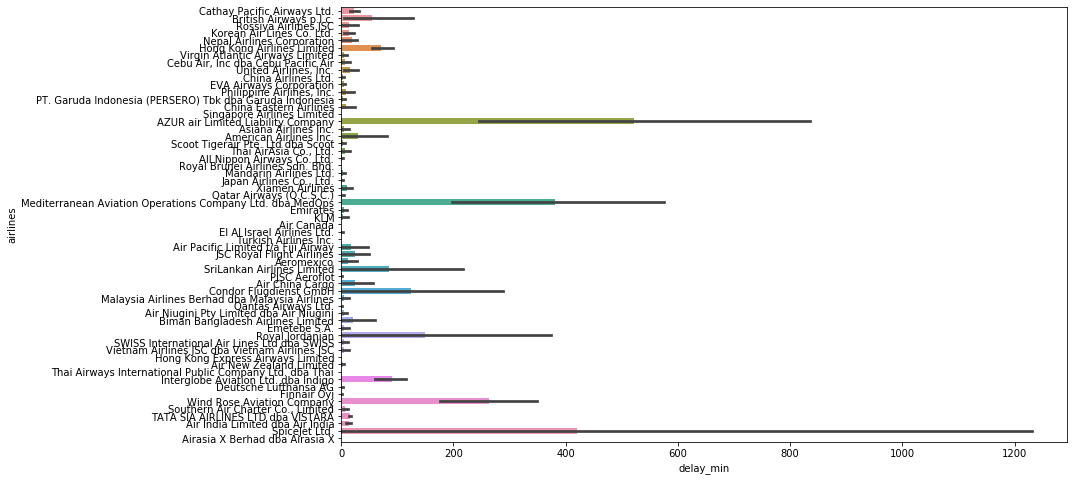

In [20]:
#part 2 - version 3:    To work on data based on Dec csv file as dataframe called df_temp
#doc:   https://www.hongkongairport.com/iwov-resources/misc/opendata/Flight_Information_DataSpec_en.pdf
#site:  https://data.gov.hk/en-data/dataset/aahk-team1-flight-info

df_temp = df_all_date       #continue to work on the data above     #df_temp = pd.read_csv('air' + '_Raw_202012v4' + '.csv')

#---------------------------------------Data processing---------------------------------------
#>>>Drop unnessacary columns: ['terminal' , 'aisle' , 'gate']
df_temp = df_temp.drop(['terminal' , 'aisle' , 'gate'], axis = 1) 
#>>>Destination column
df_temp['destination'] = df_temp['destination'].astype('str')   #from list format to string format
df_temp['destination'] = df_temp['destination'].str.extract(r'([A-Z]+)',expand = True)  #extract the three-character airport code
#>>>StatusCode column
df_temp['statusCode'] = df_temp['statusCode'].astype('str')
#>>>Flight number column
df_temp['flight number'] = df_temp['flight'].apply( lambda x: x[0]['no'])
#>>>Airline column
df_temp['airline'] = df_temp['flight'].apply( lambda x: x[0]['no'][0:2])        
#>>>Scheduled departure time
from datetime import datetime
df_temp['sche_dept_time'] = df_temp['time'].apply( lambda x: datetime.strptime(x, '%H:%M'))
#>>>actual_dept_time column
df_temp['day'] = df_temp['status'].apply( lambda x: timedelta(days=1) if '(' in x else timedelta(days=0) )
df_temp['actual_dept_time'] = df_temp['status'].str.extract(r'Dep (..:..)')
df_temp['actual_dept_time'] = df_temp['actual_dept_time'].apply( lambda x: datetime.strptime(x, '%H:%M'))  #convert to datetime format
#>>> to do: add the date into the delay time columns for calculation
##############df_temp['dept_date'] = df_temp['extract_date'].str.extract(r'([A-Z]+)',expand = True)

#>>>delay column
df_temp['delay_time'] = df_temp['actual_dept_time'] - df_temp['sche_dept_time']  + df_temp['day']            
df_temp['delay_time'] = df_temp['delay_time'].apply( lambda x: x if x > timedelta(days=0) else timedelta(days=0))
#>>>Delay time in minute for visualization
df_temp['delay_min'] = df_temp['delay_time'].astype('str')
df_temp['delay_min'] = df_temp['delay_min'].str.extract(r':(..):',expand = True)
df_temp['delay_min'] = df_temp['delay_min'].astype('int')
df_temp['delay_hour'] = df_temp['delay_time'].astype('str')
df_temp['delay_hour'] = df_temp['delay_hour'].str.extract(r'(..):',expand = True)
df_temp['delay_hour'] = df_temp['delay_hour'].astype('int')*60
df_temp['delay_min'] = df_temp['delay_min']+df_temp['delay_hour']

#>>>convert airline
with open('full_name.text','r') as f:
    full_txt = f.read()
    full_txt_list = full_txt.split('|')
with open('short_name.text','r') as f:
    short_txt = f.read()
    short_txt_list = short_txt.split('|')

def short_to_full_airline_name(x):
    return full_txt_list[short_txt_list.index(x)]
df_temp['airlines'] = df_temp['airline'].apply(lambda x: short_to_full_airline_name(x))


#>>> get airline rating file to do mapping
df_airline_rating = pd.read_csv('./data/airline_rating_edit_csv.csv')
def get_rating(x):
    try:
        #x = ''.join(ch for ch in x if (ch.isalpha()) or ch==' ')  #get only character/ space in string
        df_airline_rating.index[df_airline_rating['IATA_name']==x].tolist()[0]
        df_airline_rating['Rating'][df_airline_rating.index[df_airline_rating['IATA_name']==x].tolist()[0]]
        return df_airline_rating['Rating'][df_airline_rating.index[df_airline_rating['IATA_name']==x].tolist()[0]]
    except:
        return '100+'
df_temp['airlines_ranking'] = df_temp['airlines'].apply(lambda x: get_rating(x))
#df_temp['airlines_ranking'] = df_temp['airlines_ranking'].astype('int')


#>>>Drop used columns: ['flight']
df_temp = df_temp.drop(['flight' , 'status'], axis = 1)
#---------------------------------------Data processing (Done) -------------------------------

#---------------------------------------File export-------------------------------------------
#df_temp.to_csv('air' + '_Finalizing_202012v4' + '.csv' , index = None)


#------------------------------Data type testing(Begin)-------------------------------------
#print('type of a column: ', type(df_temp['dept_date'][0:1]) , ' | value of a column: ', df_temp['dept_date'][0:1] )
#print('type of mean of a column: ', type(df_temp['delay_time'][0:2].mean()) , ' | value of mean of a column: ', df_temp['delay_time'][0:2].mean() )
#print('group by ' , df_temp.groupby('destination')['delay_time'].count())
#datetime_object = datetime.strptime(df_temp['time'][0], '%H:%M')
#print(datetime_object)
#print('type of a column: ', type(df_temp['flight'][0]) , ' | value of a column: ', df_temp['flight'][0] )
#------------------------------Data type testing(End)-------------------------------------

#------------------------------stats and graphs for presentation---------------------------
print( ' This is group by type:  ' , type(  df_temp.groupby('destination').delay_time ) )
print( '\n\n---Max delay time of each destination is: ---\n' , df_temp.groupby('destination')['delay_time'].max() )
#print( '\n\n---Average delay time of each destination is: ---\n' , list( df_temp.groupby('destination')['delay_time']) )
print( 'by destination and then by airline: (Mean) \n', df_temp.groupby(['destination','airlines']).delay_min.mean()   )
print( 'by airline and then by destination: (Mean) \n' ,df_temp.groupby(['airlines','destination']).delay_min.mean()   )
print( 'by destination and then by airline (Max): \n', df_temp.groupby(['destination','airlines']).delay_min.max()   )


# agg = lambda x: (x['Timestamp'].astype('i8') * (x['Value'].astype('f8') / x['Value'].sum())).sum()
# new_table = table.groupby(level='ID').apply(agg).astype('i8').astype('datetime64[ns]')
fig, ax = plt.subplots(figsize=(13,8))
sns.barplot(data=df_temp, x = 'delay_min' , y = 'airlines' )

#### to do timestamp
#fmt = '%Y -----'
#datetime.strptime('timestamp string' , fmt)
#### to do timestamp

df_temp.head() 
df_temp.to_csv('./data/air' + '_Final_202012v5r2' + '.csv' , index = None)

#>>df_graph
#input = ABC airport
#Output = Airline, Delay time in average
#explore:       distance between airport #https://www.dices.net/airports/calculateDist.php  ;
#               relationship with cancelled flights